# Characters Segmentation

### imports

In [22]:
import cv2
import numpy as np
# from matplotlib import pyplot as plt
import random
import json

### main variables

In [2]:
image_path = '../images/03.png'
walsh_path = '../res/walsh.json'
white = 0
black = 1
thresh = 100
blue=(255,255,0)
green=(0,255,0)
red=(0,255,255)
violet=(155,205,155)

### functions

In [3]:
#Source: https://stackoverflow.com/a/42314798

def plotimage(img, title=None, figsize=None, invert=True):
    import numpy as np
    from matplotlib import pyplot as plt
    
    if invert:
        img = np.max(img) - img.copy()
    h = img.shape[0]
    w = img.shape[1]
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])    
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()


In [4]:
def gray_to_bw(gray, thresh):
    '''
    Returns a new image
    '''
    import numpy as np

    bw = gray.copy()
    bw[bw<thresh]=0
    bw[bw>=thresh]=255
    return bw    


In [5]:
def draw_borders(img, color=0):
    
    import numpy as np
    
    if len(img.shape)==2:
        res = color * np.ones((img.shape[0]+2,img.shape[1]+2),dtype=img.dtype)
    else:
        res = color * np.ones((img.shape[0]+2,img.shape[1]+2,3),dtype=img.dtype)
        
    res[1:-1,1:-1] = img
    return res

### Read Image

In [6]:
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plotimage(gray, 'GrayScale', invert=False)

<Figure size 1628.75x513.75 with 1 Axes>

## Convert to Black and White

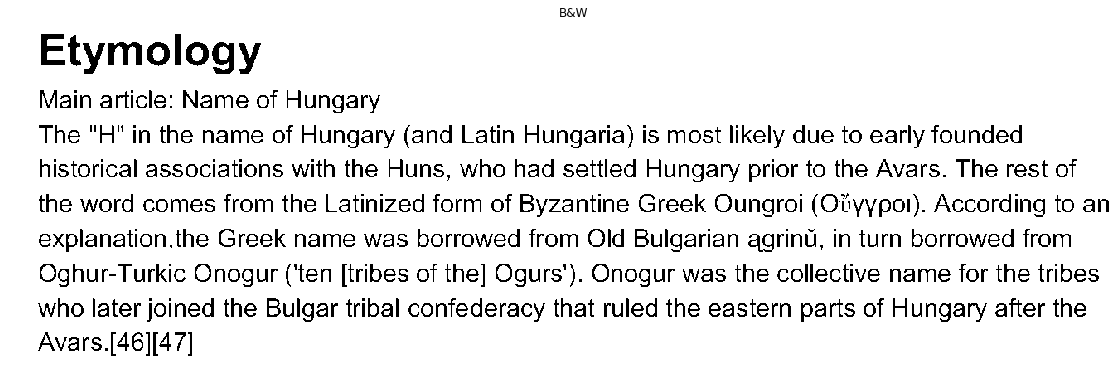

In [7]:
bw=1-gray_to_bw(gray, thresh)//255
plotimage(bw, 'B&W', figsize=(15,15))

### Vertical Segmentation

In [8]:
def vert_seg(bw):
    import numpy as np

    lines = []

    width = bw.shape[1]
    height = bw.shape[0]

    i = 0
    start = 0
    while True:
        if black not in bw[i,:] or i==height-1:
            if i==height-1:
                end = i
            else:
                end = i-1
                
            if i!=start:
                lines.append({'start': start,'end': end})            
            start=i+1

        if i==height-1:
            break
        i+=1    
        
    return lines

In [9]:
def draw_vert_lines(vert, lines):
    import cv2
    import numpy as np
    
    width = vert.shape[1]
    height = vert.shape[0]
    for line in lines:
        start = line['start']
        end = line['end']
        cv2.line(vert, (0,start), (width,start), blue)
        cv2.line(vert, (0,end), (width,end), red)

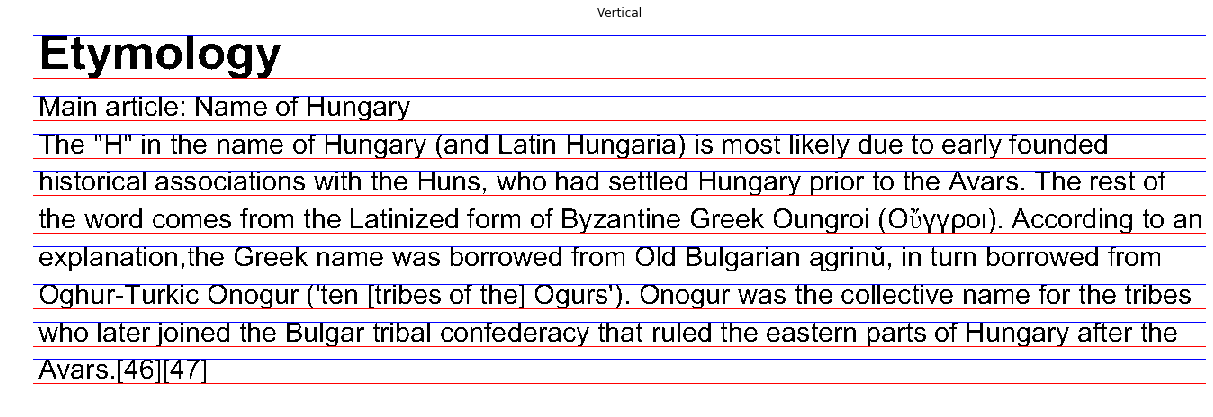

In [10]:
lines = vert_seg(bw)
vert = 255*bw.copy()
vert = cv2.cvtColor(vert, cv2.COLOR_GRAY2RGB)
draw_vert_lines(vert, lines)
plotimage(vert, 'Vertical')

### Horizontal Segmentation

In [11]:
def hor_seg(img):
    
    import numpy as np
    
    width = img.shape[1]
    height = img.shape[0]
    
    j = 0
    start = 0
    chars = []
    while True:
        if black not in img[:,j] or j==width-1: 
            if j==width-1:
                end = j
            else:
                end = j-1
            if j!=start:
                chars.append({'start':start,'end':end})
                
            start=j+1

        if j==width-1:
            break
        j+=1
        
    return chars

In [12]:
def draw_hor_lines(img, chars):
    
    import cv2
    import numpy as np
    
    width = img.shape[1]
    height = img.shape[0]
    for char in chars:
        char_start = char['start']
        char_end = char['end']
        cv2.line(hor, (char_start,start), (char_start,end), blue)  
        cv2.line(hor, (char_end,start), (char_end,end), red) 

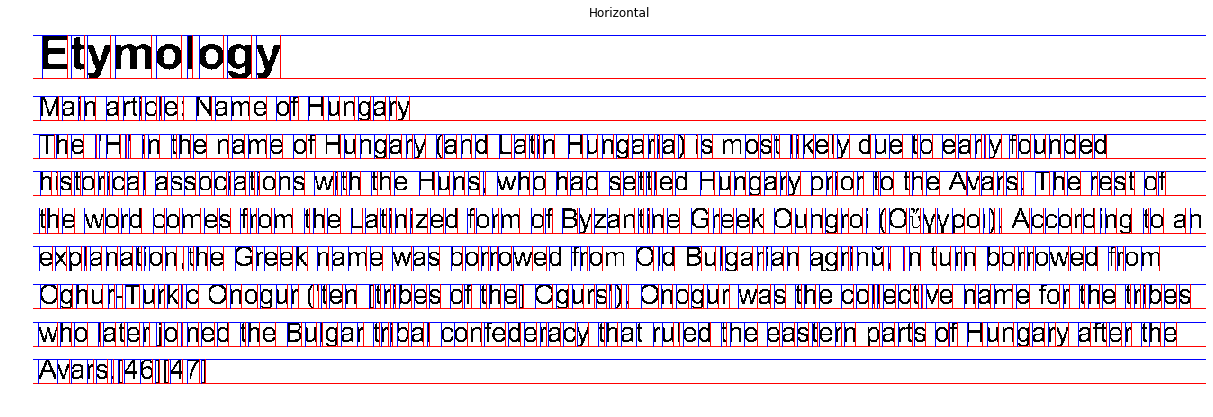

In [13]:
i = 0
start = 0

for line in lines:
    img = bw[line['start']:line['end'],:]
    line['chars'] = hor_seg(img)

hor = vert.copy()
for line in lines:
    start = line['start']
    end = line['end']
    draw_hor_lines(hor[start:end,:], line['chars'])

plotimage(hor, 'Horizontal')

## Plotting Some Random chars

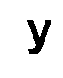

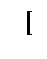

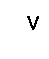

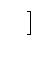

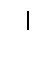

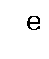

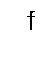

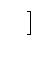

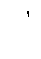

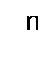

In [16]:
for k in range(10):
    i = random.randint(0,len(lines)-1)
    line = lines[i]
    j = random.randint(0,len(line['chars'])-1)
    char = line['chars'][j]
    
    img = bw[line['start']:line['end'],char['start']:char['end']]
    
    plotimage(img,'')

### Vertical Segmentation for every Char

In [17]:
for line in lines:
    for char in line['chars']:
        img = bw[line['start']:line['end'],char['start']:char['end']]
        char['vertical_parts'] = vert_seg(img)

[{'start': 0, 'end': 21}]


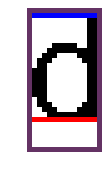

[{'start': 6, 'end': 21}]


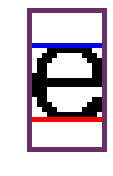

[{'start': 6, 'end': 26}]


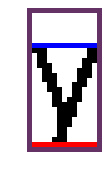

[{'start': 0, 'end': 26}]


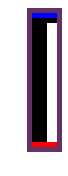

[{'start': 0, 'end': 21}]


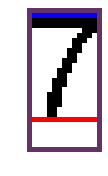

[{'start': 2, 'end': 38}]


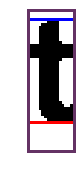

[{'start': 11, 'end': 47}]


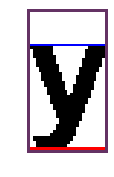

[{'start': 6, 'end': 21}]


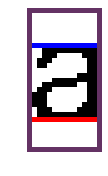

[{'start': 0, 'end': 21}]


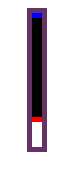

[{'start': 10, 'end': 38}]


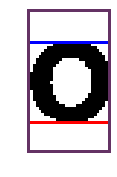

In [18]:
for k in range(10):
    i = random.randint(0,len(lines)-1)
    line = lines[i]
    j = random.randint(0,len(line['chars'])-1)
    char = line['chars'][j]
    
    img = 255*bw[line['start']:line['end'],char['start']:char['end']]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) 
    
    draw_vert_lines(img, char['vertical_parts'])
            
    img = draw_borders(img, color=violet)
#     img = draw_borders(img, color=0)
    print(char['vertical_parts'])
    plotimage(img,'', (2,2))

## Walsh-Functions

### Read walsh functions

In [23]:
with open(walsh_path) as f:
    s = f.read()
walsh_list = json.loads(s)
walsh = []
for l in walsh_list:
    walsh.append(np.array(l))

### Calculcate Walsh Vectors

In [24]:
def inner_prod(a,b):
    '''
    a and b are 2D numpy arrays, with exact same shape
    '''
    return int(np.sum(np.abs(a-b)))

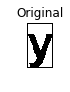

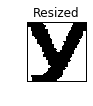

Walsh [2225, 3841, 4107, 4031, 3957, 4261, 4071, 4123, 3915, 4215, 3833, 4329, 3923, 4263, 3913, 4241, 4587, 3339, 3429, 3801, 4087, 4151, 3737, 3981, 4265, 4261, 4135, 4007, 4105, 4061, 4063, 4103, 4413, 4781, 3971, 3991, 4037, 3717, 4115, 4039, 4131, 4095, 4357, 4133, 4111, 4019, 4169, 4081, 4319, 3799, 4093, 3993, 3999, 4167, 4101, 4097, 4113, 4069, 4043, 4115, 4085, 4097, 4135, 4071]


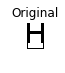

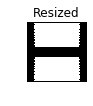

Walsh [2644, 4096, 4604, 4096, 3604, 4096, 4588, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 3284, 4096, 3964, 4096, 4244, 4096, 3948, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 3284, 4096, 3964, 4096, 4244, 4096, 3948, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 3284, 4096, 3964, 4096, 4244, 4096, 3948, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096]


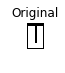

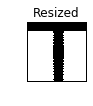

Walsh [2898, 3614, 3642, 3614, 3714, 3726, 3738, 3726, 4316, 4060, 4060, 4060, 4068, 4068, 4068, 4068, 4718, 4002, 3974, 4002, 4030, 4018, 4006, 4018, 3876, 4132, 4132, 4132, 4124, 4124, 4124, 4124, 3474, 4190, 4218, 4190, 4162, 4174, 4186, 4174, 4316, 4060, 4060, 4060, 4068, 4068, 4068, 4068, 4718, 4002, 3974, 4002, 4030, 4018, 4006, 4018, 3876, 4132, 4132, 4132, 4124, 4124, 4124, 4124]


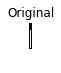

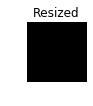

Walsh [0, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096]


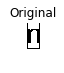

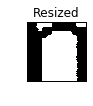

Walsh [2165, 3801, 3809, 3813, 4043, 4043, 4039, 4031, 3811, 4155, 4159, 4167, 4225, 4221, 4205, 4209, 2773, 4409, 4401, 4405, 4275, 4275, 4287, 4279, 3839, 4183, 4171, 4179, 4013, 4009, 4009, 4013, 3759, 4171, 4163, 4159, 4029, 4029, 4033, 4041, 4321, 3977, 3973, 3965, 3943, 3947, 3963, 3959, 3719, 4131, 4139, 4135, 4165, 4165, 4153, 4161, 4285, 3941, 3953, 3945, 4075, 4079, 4079, 4075]


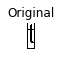

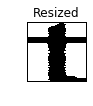

Walsh [2536, 3946, 4288, 4498, 4304, 4514, 3752, 3962, 4226, 4016, 4226, 4016, 4226, 4016, 4226, 4016, 5146, 3988, 4162, 4204, 4146, 4188, 3930, 3972, 4092, 4050, 4092, 4050, 4092, 4050, 4092, 4050, 3418, 4152, 4098, 3984, 4082, 3968, 4250, 4136, 4056, 4170, 4056, 4170, 4056, 4170, 4056, 4170, 4804, 4010, 4124, 4178, 4140, 4194, 3972, 4026, 4106, 4052, 4106, 4052, 4106, 4052, 4106, 4052]


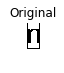

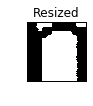

Walsh [2165, 3801, 3809, 3813, 4043, 4043, 4039, 4031, 3811, 4155, 4159, 4167, 4225, 4221, 4205, 4209, 2773, 4409, 4401, 4405, 4275, 4275, 4287, 4279, 3839, 4183, 4171, 4179, 4013, 4009, 4009, 4013, 3759, 4171, 4163, 4159, 4029, 4029, 4033, 4041, 4321, 3977, 3973, 3965, 3943, 3947, 3963, 3959, 3719, 4131, 4139, 4135, 4165, 4165, 4153, 4161, 4285, 3941, 3953, 3945, 4075, 4079, 4079, 4075]


In [25]:
c = 7 #samples to plot

for line in lines:
    for char in line['chars']:
        start=line['start']
        end=line['end']
        
        if char['vertical_parts'] and len(char['vertical_parts'])>0:
            start=line['start']+char['vertical_parts'][0]['start']
            end=line['start']+char['vertical_parts'][-1]['end']
                    
        img = bw[start:end,char['start']:char['end']]
        img = img.copy()
        img = cv2.resize(img, (64,64))
        v = []
        for w in walsh:
            v.append(inner_prod(img, w))
        char['walsh_vector'] = v        
        
        if c and np.random.randint(10)==0:
            original_img = bw[line['start']:line['end'],char['start']:char['end']]
            plotimage(draw_borders(original_img,black),title='Original')
            plotimage(draw_borders(img,black), title='Resized')
            print("Walsh", v)
            c-=1
        

## <font color="red">ERRORS:</font>
* Letter I appears as 64x64 black image, same as a dot (.)
* Letter i appears as two big stripes

### Vector Comparison

In [26]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
        return v
    return v / norm

In [27]:
def distance(v1, v2):
    return np.dot((v1), (v2))

In [28]:
v1 = lines[1]['chars'][4]['walsh_vector']
v2 = lines[2]['chars'][5]['walsh_vector']

distance(v1, v2)

1061649344

### Save result in a json file

In [29]:
s = json.dumps({"image_path": image_path, "threshold": thresh, "lines":lines}, indent=2)
with open(image_path+'.lines.json', 'w') as f:
    f.write(s)